In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import peakutils
from util.FreqReader import read_freq
from util.DoubleAnharmonicity import DoubleAnharmonicity


plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200

In [2]:
def do_anharmonism_correction(x, coef1, coef2):
    if 1000 < x < 2000:
       return x * coef1
    elif 2000 < x:
      return x * coef2

In [3]:
begen_acid_10K = read_freq("begen/begen_acid_flat_cis_10K_ir.txt")
begen_acid_25K = read_freq("begen/begen_acid_flat_cis_25K_ir.txt")
begen_acid_50K = read_freq("begen/begen_acid_flat_cis_50K_ir.txt")
begen_acid_298K = read_freq("begen/begen_acid_flat_cis_298K_ir.txt")
begen_acid_298K_water = read_freq("begen/begen_acid_flat_cis_298K_water_ir.txt")

begen_acid_true_298K = read_freq("begen/BEGEN_ACID_TRUE_298K_ir.txt")
begen_acid_true_10K = read_freq("begen/BEGEN_ACID_TRUE_10K_ir.txt")
begen_acid_true_10K_GS_9 = read_freq("begen/BEGEN_ACID_TRUE_10K_9_ir.txt")



In [4]:
def plot_all(dfs,legends, coef1=1, coef2=1, y_shift=0, showPeaks=False, forcedFirstPeaks=True):
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        plt.plot(x, y+i*y_shift, '-', lw=1.7, alpha=1)

        i = i+1
    
    i = 0
    if showPeaks or forcedFirstPeaks: 
        for df in dfs:
            x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
            y = df['Y']
            peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
            for peak in peaks:
                if x[peak] > 2000:
                    plt.text(x[peak], y[peak]+50+i*y_shift, int(x[peak]), horizontalalignment='center', color='darkgreen')
            plt.plot(x[peaks], y[peaks]+i*y_shift, 'darkgreen', marker="o", ls="", ms=5)
            i = i+1
            if not showPeaks:
                break
    i = 0
    for df in dfs:
        x = df['X'].map(lambda x: do_anharmonism_correction(x, coef1, coef2))
        y = df['Y']
        peaks = peakutils.indexes(y, thres=0.01, min_dist=1)
        plt.plot(x[peaks], y[peaks]+i*y_shift, marker="o", ls="", ms=5)

        i = i+1
    plt.legend(legends, title='coef1=' + str(coef1) + ";" + "coef2=" + str(coef2))

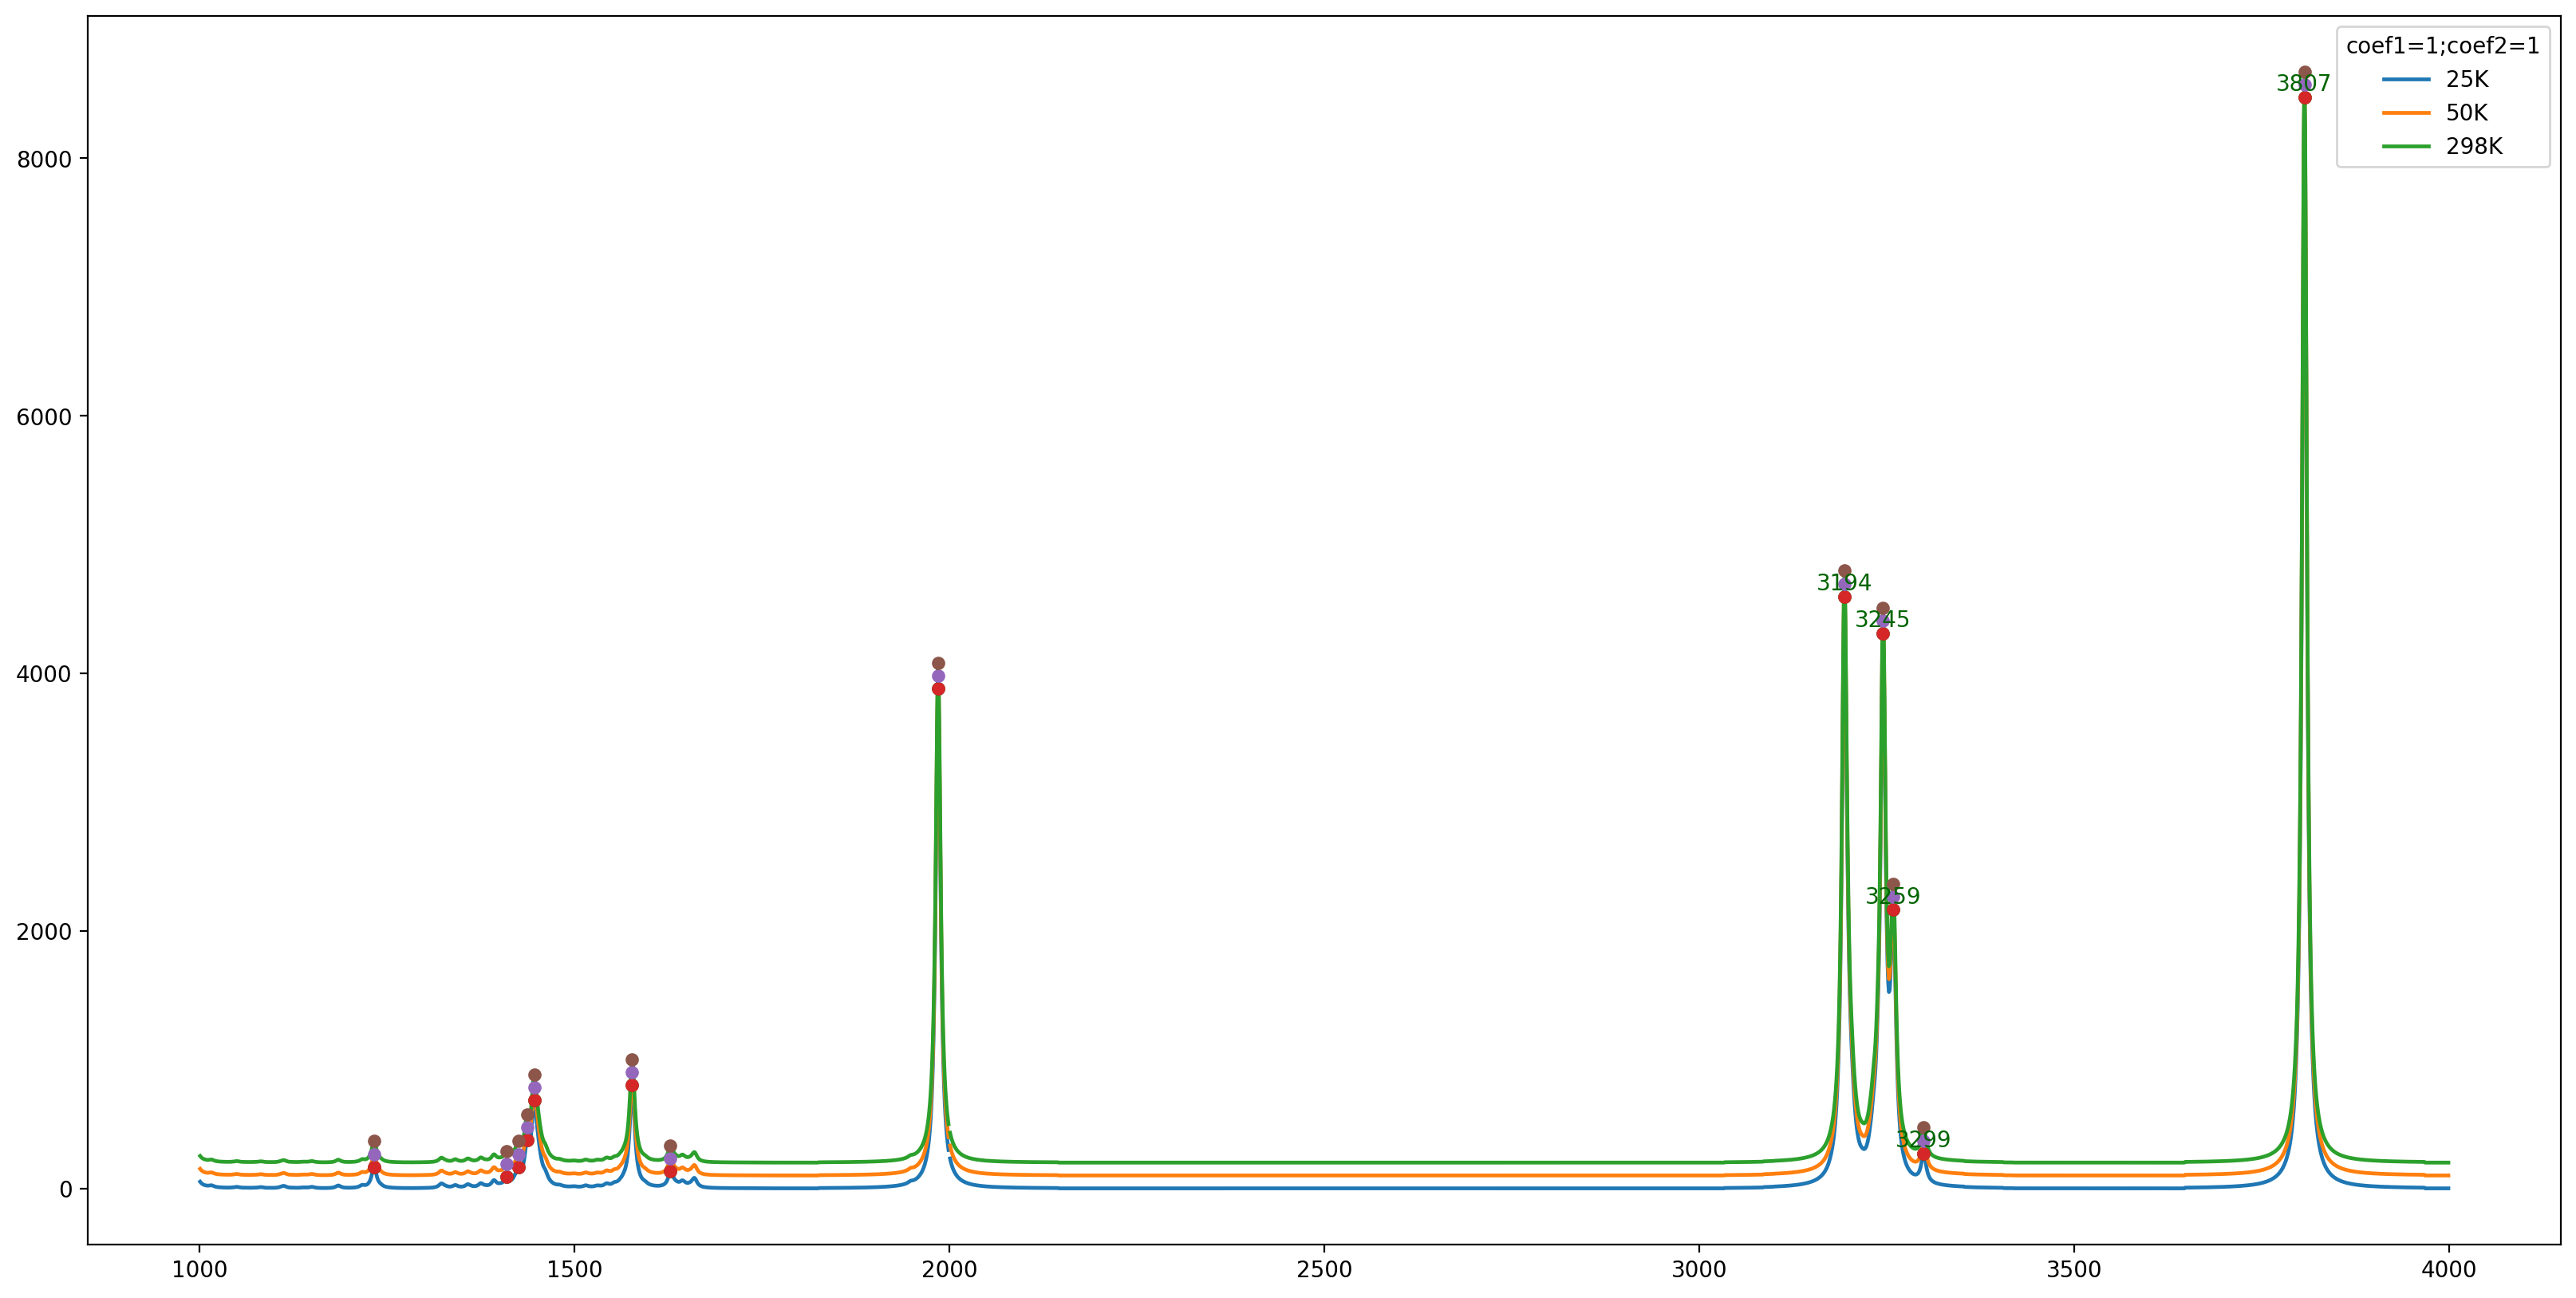

In [5]:
plot_all([begen_acid_25K, begen_acid_50K, begen_acid_298K],
          ['25K', '50K', '298K'],
          coef1=1, coef2=1, y_shift=100)

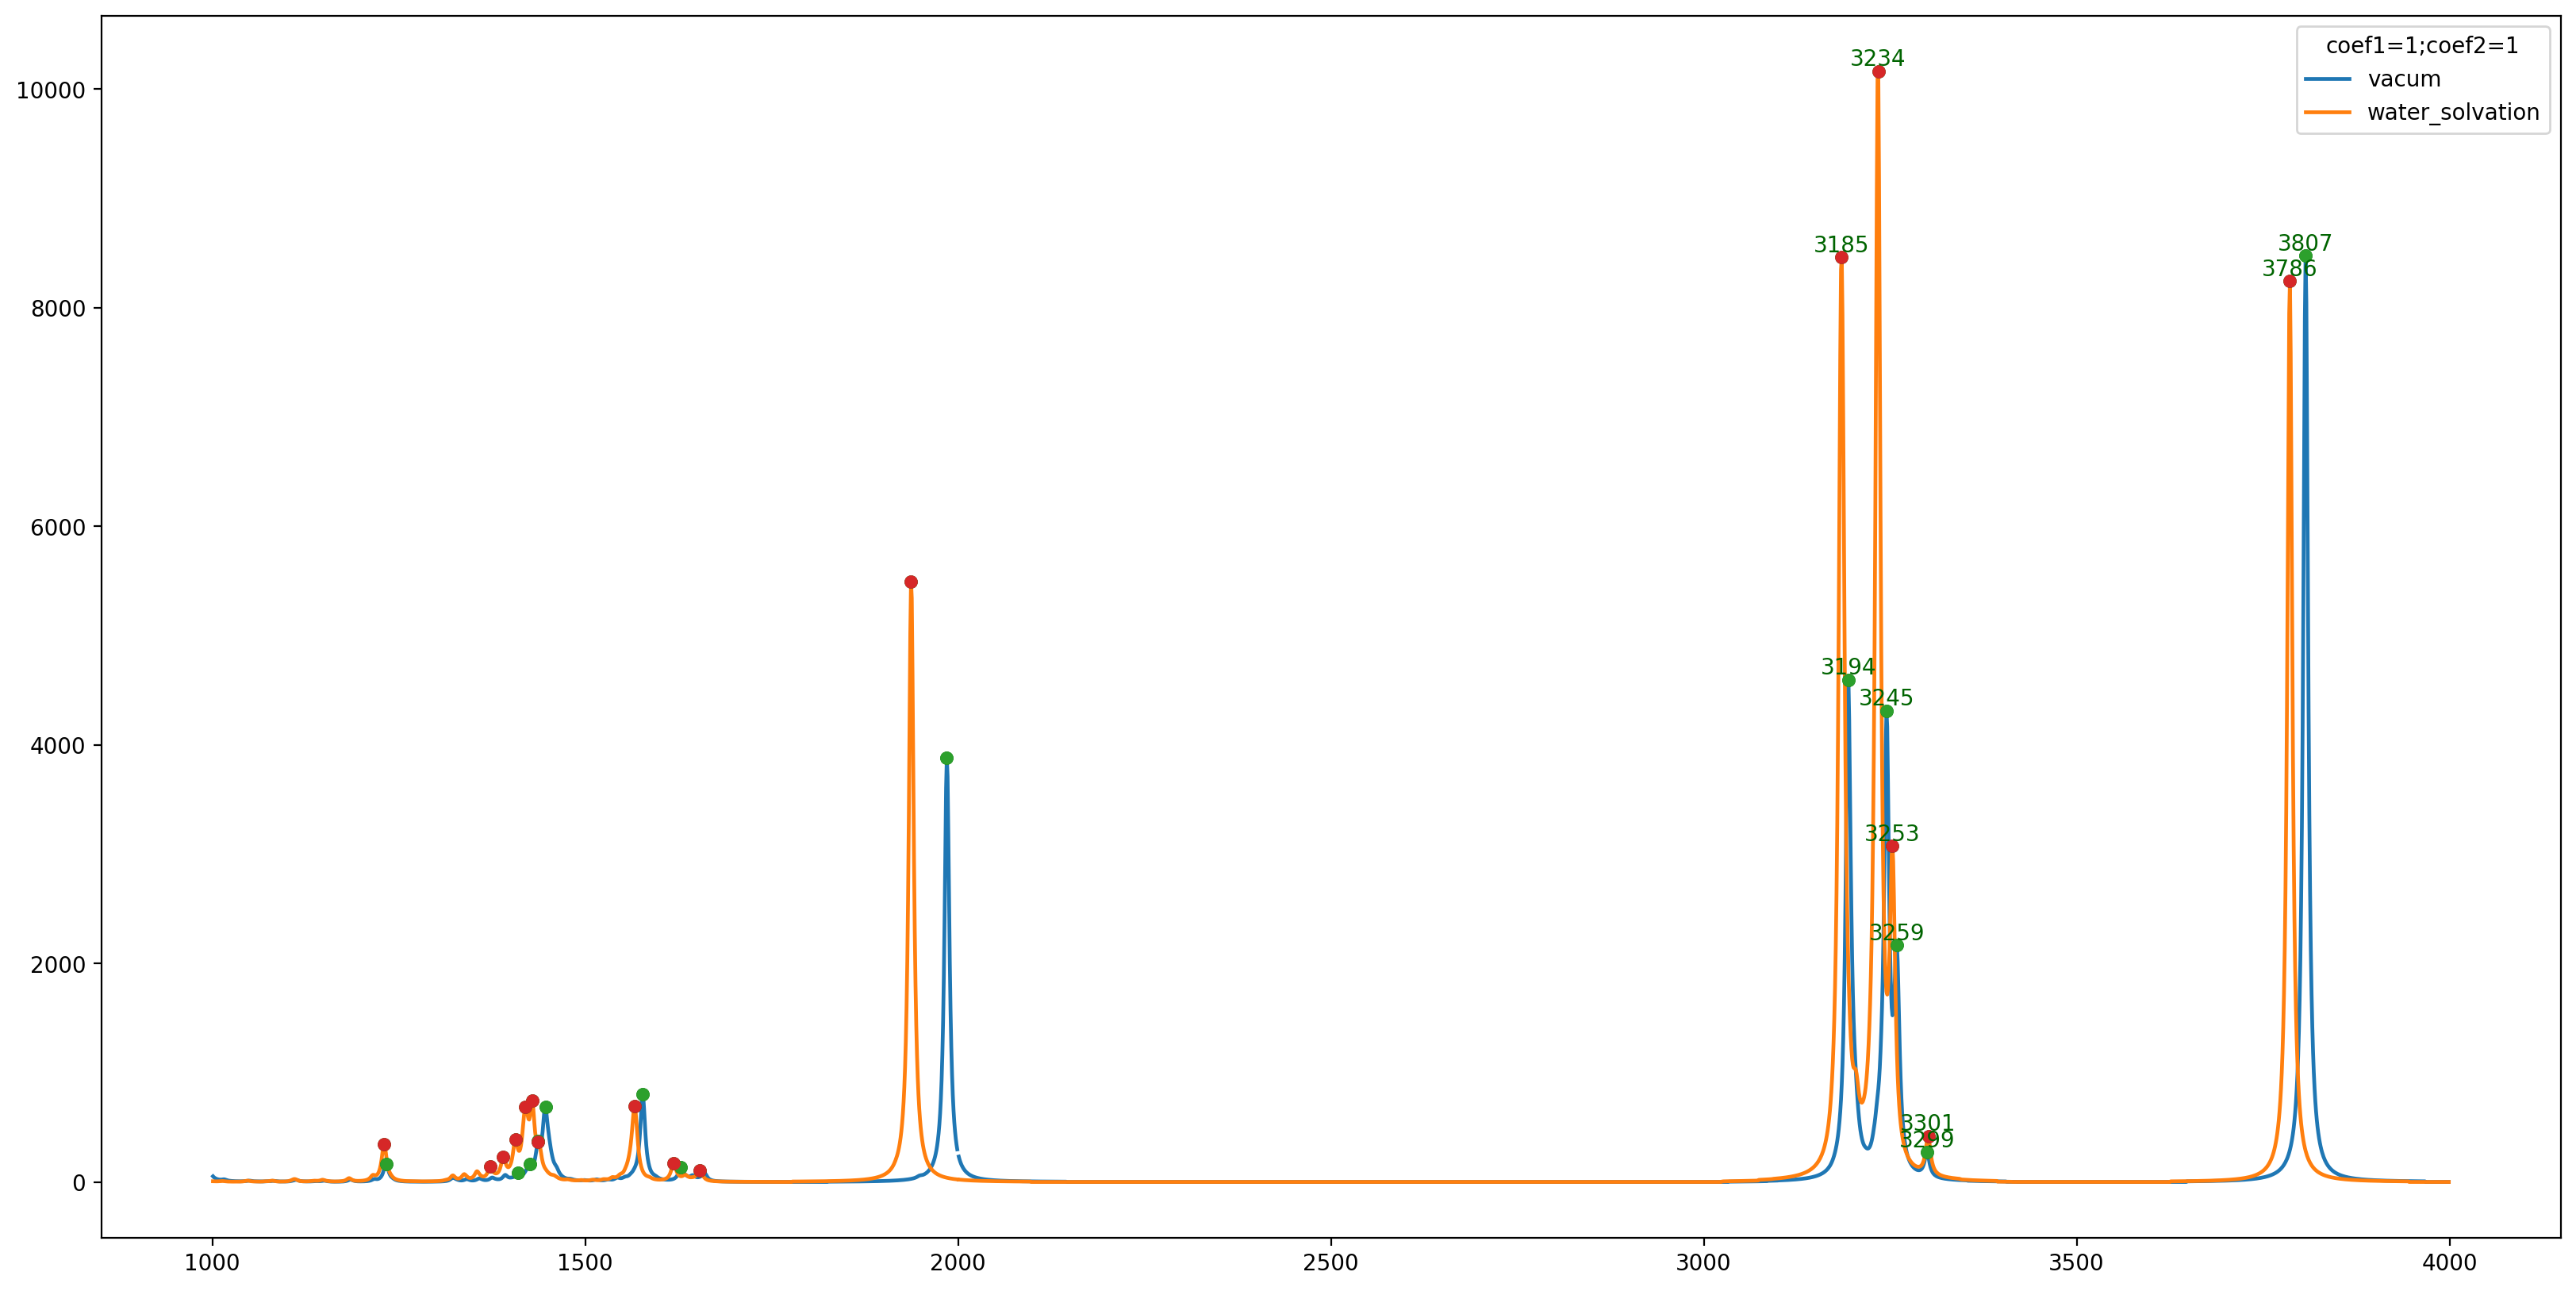

In [6]:
plot_all([begen_acid_298K, begen_acid_298K_water],
          ['vacum', 'water_solvation', ],
          coef1=1, coef2=1, y_shift=0, showPeaks=True)

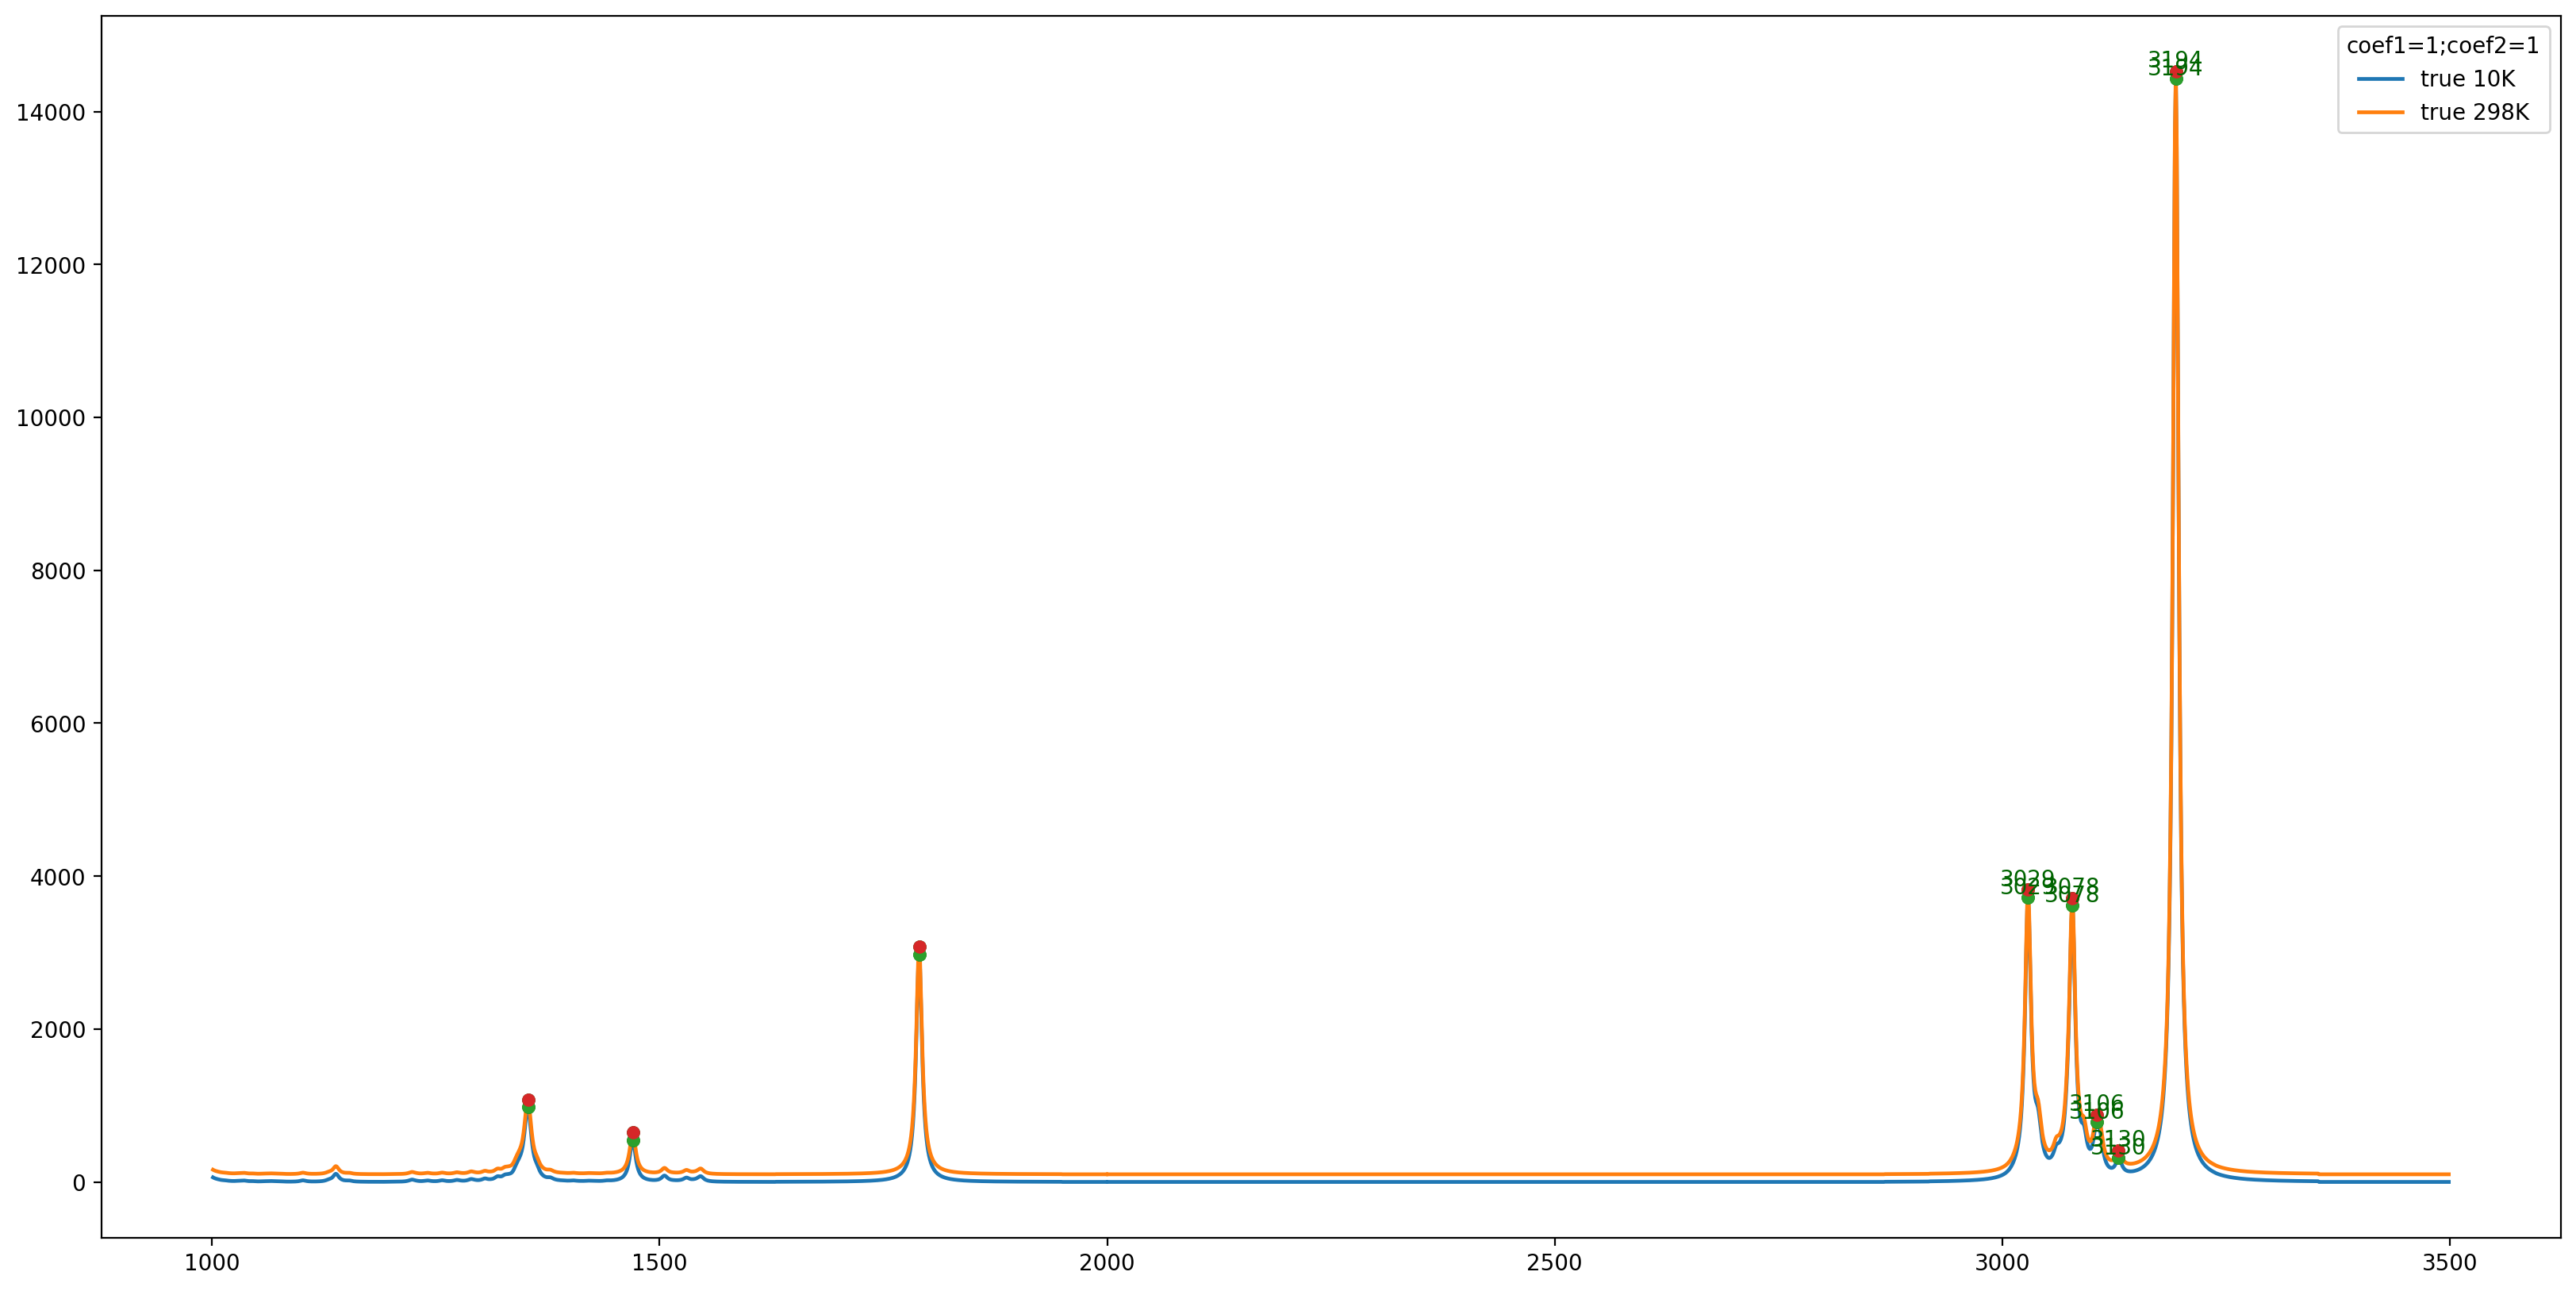

In [7]:
plot_all([begen_acid_true_10K, begen_acid_true_298K],
          ['true 10K', 'true 298K', ],
          coef1=1, coef2=1, y_shift=100, showPeaks=True)

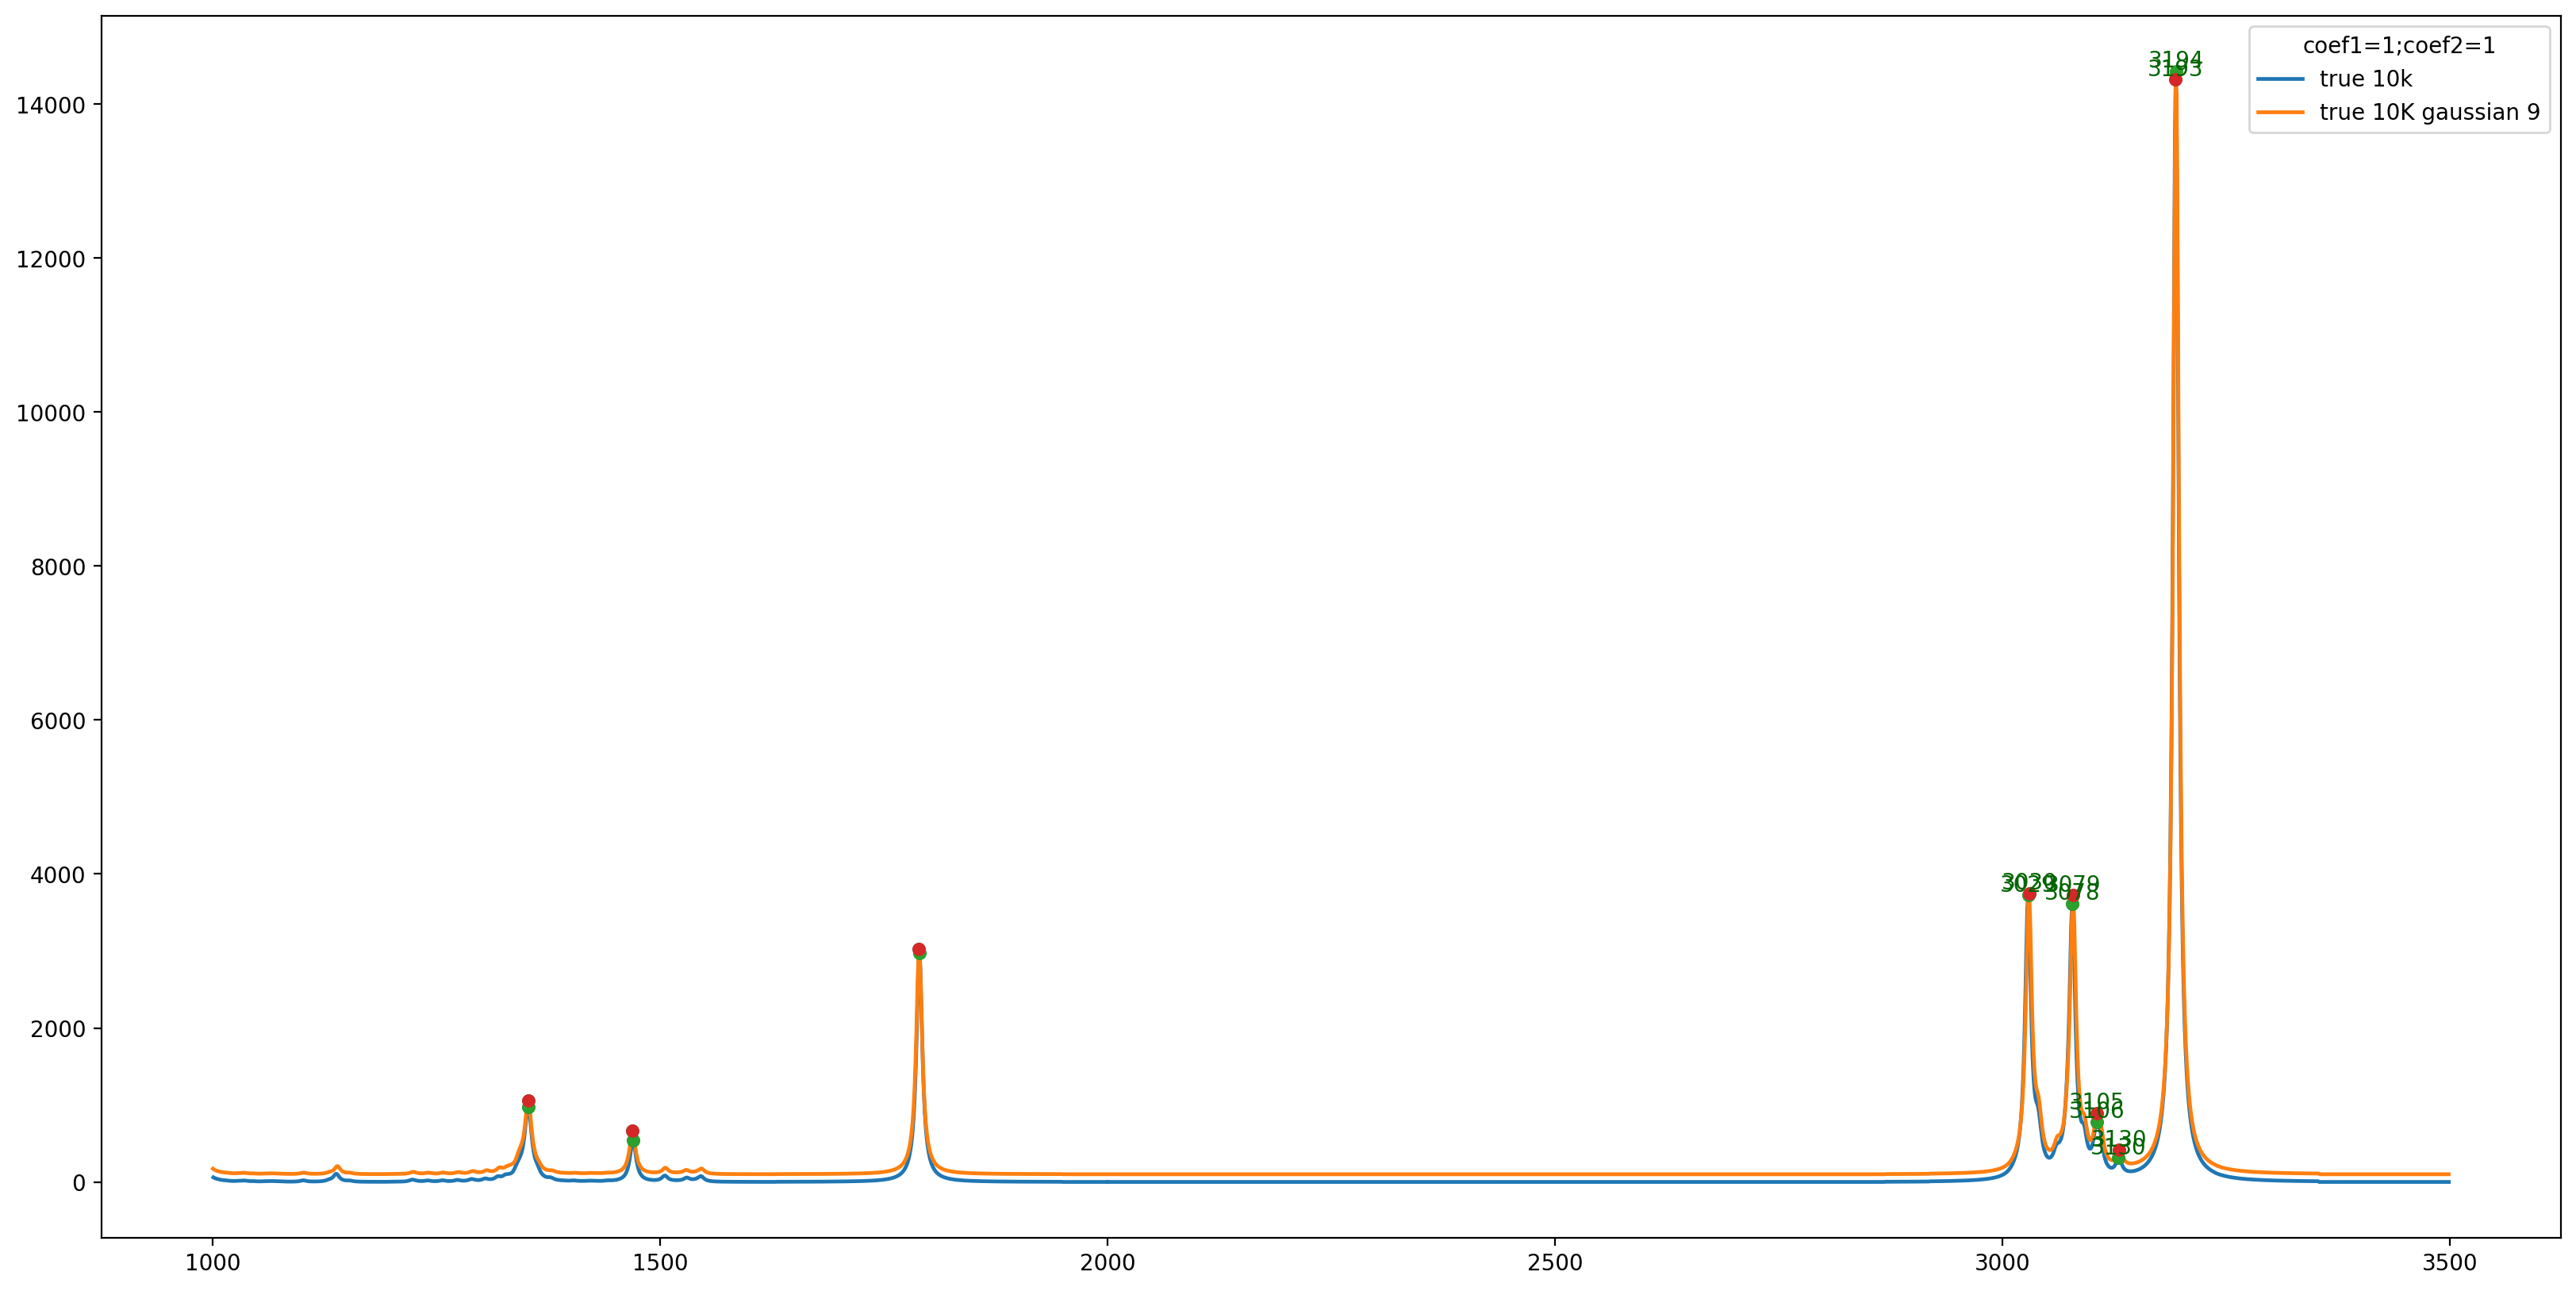

In [8]:
plot_all([begen_acid_true_10K, begen_acid_true_10K_GS_9],
          ['true 10k', 'true 10K gaussian 9', ],
          coef1=1, coef2=1, y_shift=100, showPeaks=True)